# Análisis videos laboratorio óptica: Cristales líquidos

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [46]:
path = '/Users/javier/Documents/university/6th-semester/'+\
       'experimental-physic2/optic-lab/video-analysis/videos/'

cap = cv2.VideoCapture(path+'image_5.avi')  # selección del video
cap2 = cv2.VideoCapture(path+'image_7.avi')
capDown7 = cv2.VideoCapture(path+'DDLCCMMR_7-001.avi')
capUp6 = cv2.VideoCapture(path+'DDLCCMMR_6-002.avi')

fps = cap.get(cv2.CAP_PROP_FPS)  # frames per second
fps2 = cap2.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # cantidad de frames
frame_count2 = int(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps

# Print de la información
print('fps = ' + str(fps))
print('number of frames = ' + str(frame_count))
print('duration (S) = ' + str(duration))
minutes = int(duration/60)
seconds = duration%60
print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))

fps = 11.474
number of frames = 1951
duration (S) = 170.03660449712393
duration (M:S) = 2:50.03660449712393


In [45]:
capUp6

<VideoCapture 0x7f9fd866ff50>

## Extracción de los datos de los videos

In [3]:
mean_array = np.zeros((3, frame_count))
mean_array2= np.zeros((3, frame_count2))
i = 0
# Abre el video y lo muestra
while(cap.isOpened() or cap2.isOpened()):
  ret, frame = cap.read()
  ret2, frame2 = cap2.read()
  # frame es un numpy array de (1000,1000,3)
  mean_array[0, i] = np.mean(frame[:, :, 0])
  mean_array[1, i] = np.mean(frame[:, :, 1])
  mean_array[2, i] = np.mean(frame[:, :, 2])

  mean_array2[0, i] = np.mean(frame2[:, :, 0])
  mean_array2[1, i] = np.mean(frame2[:, :, 1])
  mean_array2[2, i] = np.mean(frame2[:, :, 2])

  interest_frame = 1500

  if i==interest_frame:
    cv2.imwrite('img/blue-frame'+str(interest_frame)+'.jpg', frame[:, :, 0])
    cv2.imwrite('img/green-frame'+str(interest_frame)+'.jpg', frame[:, :, 1])
    cv2.imwrite('img/red-frame'+str(interest_frame)+'.jpg', frame[:, :, 2])
    print('saved!')
    cv2.imshow('frame', frame)
    cv2.imshow('frame', frame2)
  else:
    cv2.imshow('frame', frame)
    cv2.imshow('frame', frame2)
  i+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
      # Se puede dejar de correr escribiendo Q
    break

cap.release()
cv2.destroyAllWindows()

saved!


TypeError: 'NoneType' object is not subscriptable

In [23]:
frame_array = np.arange(0, frame_count, 1)
frame_array2 = np.arange(0, frame_count2, 1)

def time(frame, frame_zero):
       """
       Pasa los frames a segundos tomando t=0 cuando se deja pasar
       la luz completamente a la cámara
       """
       return 1/fps*(frame-frame_zero)


def temperature(frame, frame_zero, temp_0, rate):
       t = time(frame, frame_zero)
       return rate*t/60 + temp_0

## Plot subida de temperatura

<ipython-input-32-734151bdd8e7>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


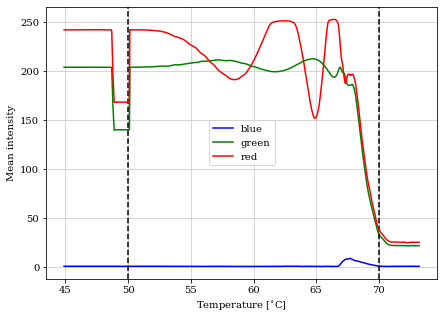

In [32]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({"font.size": 10, "font.family": "serif"})

temp_vid5_f = 70
temp_vid5_0 = 50
rate_vid5 = 10

frame_zero = np.where(mean_array[2,:]==np.min(mean_array[2,350:500]))[0][0]
time_array1 = time(frame_array, frame_zero)  # in second
temperature_array1 = temperature(frame_array, frame_zero, temp_vid5_0, rate_vid5)  # in celsius

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(temperature_array1, mean_array[0], color='blue', label='blue')
ax.plot(temperature_array1, mean_array[1], color='green', label='green')
ax.axvline(x=temperature_array1[np.where(mean_array[2,:]==np.min(mean_array[2,350:500]))[0][0]],
           linestyle='--', color='black')
ax.axvline(x=temp_vid5_f,
           linestyle='--', color='black')
ax.plot(temperature_array1, mean_array[2], color='red', label='red')
ax.legend()
ax.set_xlabel('Temperature [$^{\circ}$C]')
ax.set_ylabel('Mean intensity')
fig.show()

## Plot bajada de temperatura

<ipython-input-30-18135af62b76>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


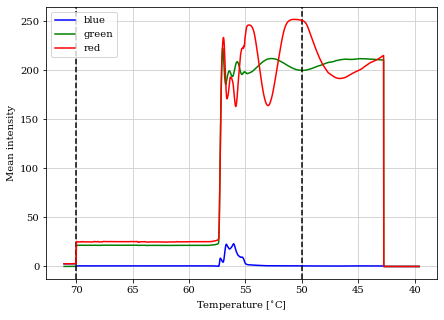

In [30]:
temp_vid7_f = 50
temp_vid7_0 = 70
rate_vid7 = -10

frame_zero2 = np.argmax(np.diff(mean_array2[2,0:100]))
time_array2 = time(frame_array2, frame_zero2)
temperature_array2 = temperature(frame_array2, frame_zero2, temp_vid7_0, rate_vid7)

fig2, ax2 = plt.subplots(figsize=(7, 5))
ax2.plot(temperature_array2, mean_array2[0], color='blue', label='blue')
ax2.plot(temperature_array2, mean_array2[1], color='green', label='green')
ax2.axvline(x=temperature_array2[frame_zero2],
           linestyle='--', color='black')
ax2.axvline(x=temp_vid7_f,
           linestyle='--', color='black')
ax2.plot(temperature_array2, mean_array2[2], color='red', label='red')
ax2.legend()
ax2.set_xlabel('Temperature [$^{\circ}$C]')
ax2.set_ylabel('Mean intensity')
ax2.invert_xaxis()
fig2.show()

In [53]:
fpsUp6 = capUp6.get(cv2.CAP_PROP_FPS)  # frames per second
fpsDown7 = capDown7.get(cv2.CAP_PROP_FPS)
frame_countUp6 = int(capUp6.get(cv2.CAP_PROP_FRAME_COUNT))  # cantidad de frames
frame_countDown7 = int(capDown7.get(cv2.CAP_PROP_FRAME_COUNT))

mean_arrayUp6 = np.zeros((3, frame_countUp6))
mean_arrayDown7 = np.zeros((3, frame_countDown7))

j = 0
# Abre el video y lo muestra
while(capUp6.isOpened() or capDown7.isOpened()):
  count_max = np.max([frame_countUp6, frame_countDown7])
  #print(f'{i / count_max:.2%}', end='\r')  # indicar la carga 
  print (np.round(j*100./count_max,2), '%')

  retUp6, frameUp6 = capUp6.read()
  retDown7, frameDown7 = capDown7.read()
  # frame es un numpy array de (1000,1000,3)
  mean_arrayUp6[0, j] = np.mean(frameUp6[:, :, 0])
  mean_arrayUp6[1, j] = np.mean(frameUp6[:, :, 1])
  mean_arrayUp6[2, j] = np.mean(frameUp6[:, :, 2])

  mean_arrayDown7[0, j] = np.mean(frameDown7[:, :, 0])
  mean_arrayDown7[1, j] = np.mean(frameDown7[:, :, 1])
  mean_arrayDown7[2, j] = np.mean(frameDown7[:, :, 2])


  #cv2.imshow('frame', frame)
  #cv2.imshow('frame', frame2)
  j+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
      # Se puede dejar de correr escribiendo Q
    break

cap.release()
cv2.destroyAllWindows()

0.0 %
0.0 %
0.0 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.04 %
0.04 %
0.04 %
0.04 %
0.04 %
0.05 %
0.05 %
0.05 %
0.05 %
0.05 %
0.05 %
0.06 %
0.06 %
0.06 %
0.06 %
0.06 %
0.07 %
0.07 %
0.07 %
0.07 %
0.07 %
0.08 %
0.08 %
0.08 %
0.08 %
0.08 %
0.08 %
0.09 %
0.09 %
0.09 %
0.09 %
0.09 %
0.1 %
0.1 %
0.1 %
0.1 %
0.1 %
0.1 %
0.11 %
0.11 %
0.11 %
0.11 %
0.11 %
0.12 %
0.12 %
0.12 %
0.12 %
0.12 %
0.12 %
0.13 %
0.13 %
0.13 %
0.13 %
0.13 %
0.14 %
0.14 %
0.14 %
0.14 %
0.14 %
0.14 %
0.15 %
0.15 %
0.15 %
0.15 %
0.15 %
0.16 %
0.16 %
0.16 %
0.16 %
0.16 %
0.16 %
0.17 %
0.17 %
0.17 %
0.17 %
0.17 %
0.18 %
0.18 %
0.18 %
0.18 %
0.18 %
0.18 %
0.19 %
0.19 %
0.19 %
0.19 %
0.19 %
0.2 %
0.2 %
0.2 %
0.2 %
0.2 %
0.21 %
0.21 %
0.21 %
0.21 %
0.21 %
0.21 %
0.22 %
0.22 %
0.22 %
0.22 %
0.22 %
0.23 %
0.23 %
0.23 %
0.23 %
0.23 %
0.23 %
0.24 %
0.24 %
0.24 %
0.24 %
0.24 %
0.25 %
0.25 %
0.25 %
0.25 %
0.25 %
0.25 %
0.26 %
0.26 %
0.26 %
0.26 %
0.26 %

TypeError: 'NoneType' object is not subscriptable

In [55]:
mean_arrayDown7

array([[  4.16258844,   4.16665778,   4.18327156, ...,   0.        ,
          0.        ,   0.        ],
       [ 93.952564  ,  93.95845689,  93.94989244, ...,   0.        ,
          0.        ,   0.        ],
       [109.14820889, 109.18080089, 109.21420667, ...,   0.        ,
          0.        ,   0.        ]])

In [56]:
np.save("mean_arrayUp6_saved.npy", mean_arrayUp6)
np.save("mean_arrayDown7_saved.npy", mean_arrayDown7)
#loaded_array = np.load("sample.npy")

<ipython-input-68-6a77cc8bfd0d>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()
<ipython-input-68-6a77cc8bfd0d>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


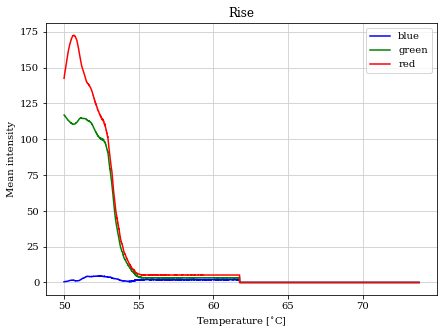

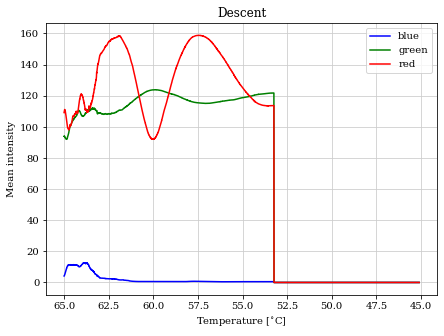

In [68]:
temp_Up6_f = 70
temp_Up6_0 = 50
rate_Up6 = 0.3

frame_arrayUp6 = np.arange(0, frame_countUp6, 1)

#frame_zeroUp6 = np.argmax(np.diff(mean_arrayUp6[2,25000:30000]))
#frame_zeroUp6 = np.where(np.diff(mean_arrayUp6[2])==np.max(np.diff(mean_arrayUp6[2,25000:30000])))
time_arrayUp6 = time(frame_arrayUp6, 0)
temperature_arrayUp6 = temperature(frame_arrayUp6, 0, temp_Up6_0, rate_Up6)


fig3, ax3 = plt.subplots(figsize=(7, 5))
ax3.plot(temperature_arrayUp6, mean_arrayUp6[0], color='blue', label='blue')
ax3.plot(temperature_arrayUp6, mean_arrayUp6[1], color='green', label='green')
#ax3.axvline(x=frame_arrayUp6[frame_zeroUp6],
#        linestyle='--', color='black')
#ax3.axvline(x=temp_vid7_f,
#        linestyle='--', color='black')
ax3.plot(temperature_arrayUp6, mean_arrayUp6[2], color='red', label='red')
ax3.legend()
ax3.set_xlabel('Temperature [$^{\circ}$C]')
ax3.set_title('Rise')
ax3.set_ylabel('Mean intensity')
fig3.tight_layout()
fig3.savefig('img/plots/riseDDLCCMMR_6-002.pdf')
fig3.show()


temp_Down7_f = 50
temp_Down7_0 = 65
rate_Down7 = -0.3

frame_arrayDown7 = np.arange(0, frame_countDown7, 1)
time_arrayDown7 = time(frame_arrayDown7, 0)
temperature_arrayDown7 = temperature(frame_arrayDown7, 0, temp_Down7_0, rate_Down7)

fig4, ax4 = plt.subplots(figsize=(7, 5))
ax4.plot(temperature_arrayDown7, mean_arrayDown7[0], color='blue', label='blue')
ax4.plot(temperature_arrayDown7, mean_arrayDown7[1], color='green', label='green')
#ax3.axvline(x=frame_arrayUp6[frame_zero2],
#        linestyle='--', color='black')
#ax3.axvline(x=temp_vid7_f,
#        linestyle='--', color='black')
ax4.plot(temperature_arrayDown7, mean_arrayDown7[2], color='red', label='red')
ax4.invert_xaxis()
ax4.legend()
ax4.set_xlabel('Temperature [$^{\circ}$C]')
ax4.set_title('Descent')
ax4.set_ylabel('Mean intensity')
fig4.tight_layout()
fig4.savefig('img/plots/descentDDLCCMMR_7-001.pdf')
fig4.show()

In [50]:

z = 0
# Abre el video y lo muestra
while(capUp6.isOpened() or capDown7.isOpened()):
  count_max = np.max([frame_countUp6, frame_countDown7])
  #print(f'{z / count_max:.2%}', end='\r')  # indicar la carga 
  print (np.round(z*100./count_max,2), '%')

  retUp6, frameUp6 = capUp6.read()
  retDown7, frameDown7 = capDown7.read()
  # frame es un numpy array de (1000,1000,3)
  #mean_arrayUp6[0, z] = np.mean(frameUp6[:, :, 0])
  #mean_arrayUp6[1, z] = np.mean(frameUp6[:, :, 1])
  #mean_arrayUp6[2, z] = np.mean(frameUp6[:, :, 2])
#
  #mean_arrayDown7[0, z] = np.mean(frameDown7[:, :, 0])
  #mean_arrayDown7[1, z] = np.mean(frameDown7[:, :, 1])
  #mean_arrayDown7[2, z] = np.mean(frameDown7[:, :, 2])


  #cv2.imshow('frame', frame)
  #cv2.imshow('frame', frame2)
  z+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
      # Se puede dejar de correr escribiendo Q
    break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [51]:
np.max([frame_countUp6, frame_countDown7])

54605

In [61]:
frame_zeroUp6


51